# What is Perceptron?
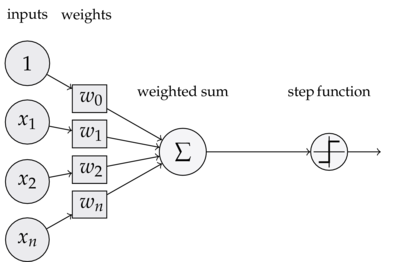


The **Perceptron** is the simplest type of artificial neural network. It consists of:
$$
\text{Inputs: } (x_1, x_2, \dots, x_n) \\
\text{Weights: } (w_1, w_2, \dots, w_n)
$$


- **Bias** \(b\)
- **Activation function** (Step Function or Sigmoid)


The perceptron (illustrated in the figure above) is a binary classifier which takes as input a vector, $\mathbf{x} = [x_1, x_2, \dotsc, x_n]^T$, and outputs a binary prediction $y \in \{-1, +1\}$. It does this by first producing a scalar value by multiplying each element in the input vector with a learned weight of the perceptron, $\mathbf{w} = [w_1, w_2, \dotsc, w_n]^T$ and then summing all the resulting elements together. This operation can be expressed as a vector dot product $\mathbf{w}^T \mathbf{x}$. The perceptron then checks if this scalar value $\mathbf{w}^T \mathbf{x}$ is greater or smaller than a threshold $t$. If the value is greater than the threshold then the perceptron predicts $y = +1$ otherwise it predicts $y = -1$. This can be expressed as a linear predictor where

$y  = \begin{cases}
          +1, & \text{if} & \mathbf{w}^T \mathbf{x} \ge t \\
          -1, & \text{if} & \mathbf{w}^T \mathbf{x} \lt t
      \end{cases}
$
#If the data is linearly separable, the algorithm is guaranteed to converge.
However, if the data is not linearly separable, this procedure does not converge, and oscillates. Below, we use a `max_iters` to in case the data is not linearly seperable. We also record the update *history* so that we can visualize the learning. To be consistent with previous classification methods, we assume the input labels are in $\{0,1\}$.





### Mathematical Representation:
$$
y = f\left( \sum_{i=1}^{n} w_i x_i + b \right)
$$
Where:
- \( y \) is the output
- \( f \) is an activation function (commonly a step function)

### Step Function Activation:
$$
f(z) =
\begin{cases}
    1, & \text{if } z \geq 0 \\
    0, & \text{if } z < 0
\end{cases}
$$


Used for **binary classification problems** (e.g., separating two classes with a straight line).

---

# Single-layer Perceptron (Basic Perceptron Model)



In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class Perceptron:

    def __init__(self, add_bias=True, max_iters=10000, record_updates=False):
        self.max_iters = max_iters
        self.add_bias = add_bias
        self.record_updates = record_updates
        if record_updates:
            self.w_hist = [] # records the weight
            self.n_hist = [] # records the data-point selected

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w = np.zeros(D)                                #initialize the weights
        if self.record_updates:
            w_hist = [w]
        #y = np.sign(y -.1)                             #to get +1 for class 1 and -1 for class 0
        y = 2*y - 1                                     # converting 0,1 to -1,+1
        t = 0
        change = True                                  #if the weight does not change the algorithm has converged
        while change and t < self.max_iters:
            change = False
            for n in np.random.permutation(N):
                yh = np.sign(np.dot(x[n,:], w))        #predict the output of the training sample
                if yh == y[n]:
                    continue                           #skip the samples which are correctly classified
                #w = w + (y[n]-yh)*x[n,:]               #update the weights
                w = w + y[n]*x[n,:]
                if self.record_updates:
                    self.w_hist.append(w)
                    self.n_hist.append(n)
                change = True
                t += 1
                if t >= self.max_iters:
                    break
        if change:
            print(f'did not converge after {t} updates')
        else:
            print(f'converged after {t} iterations!')
        self.w = w
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = np.sign(np.dot(self.w, x))
        return (yh + 1)//2                         # converting -/+1 to classes 0,1

Let's apply this to do binary classification with **Iris flowers dataset**. Here, we choose the labels and two features to make the task linearly separable.

In [ ]:
from sklearn import datasets
dataset = datasets.load_iris()
x, y = dataset['data'][:,2:], dataset['target']      #slice last two features of Iris dataset
x, y = x[y < 2, :], y[y< 2]                          #slice class 0 and 1

model = Perceptron(record_updates=True)
yh = model.fit(x,y)

converged after 19 iterations!


Let's plot the decision bounday $w^\top x = 0$ using the update history.

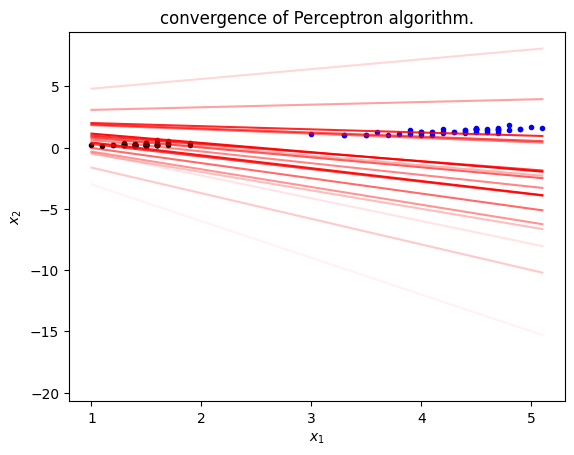

In [ ]:
plt.plot(x[y==0,0], x[y==0,1], 'k.' )
plt.plot(x[y==1,0], x[y==1,1], 'b.' )
x_line = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
for t,w in enumerate(model.w_hist):
    coef = -w[0]/w[1]                                     #slope of the decision boundary
    plt.plot(x_line, coef*x_line - w[2]/w[1], 'r-',
             alpha=t/len(model.w_hist), label=f't={t}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('convergence of Perceptron algorithm.')
plt.show()

In [ ]:
dataset = datasets.load_iris()
x, y = dataset['data'][:,:], dataset['target']
print(x.shape)

(150, 4)


Next let's try an example where the data is not linearly separable

did not converge after 10000 updates


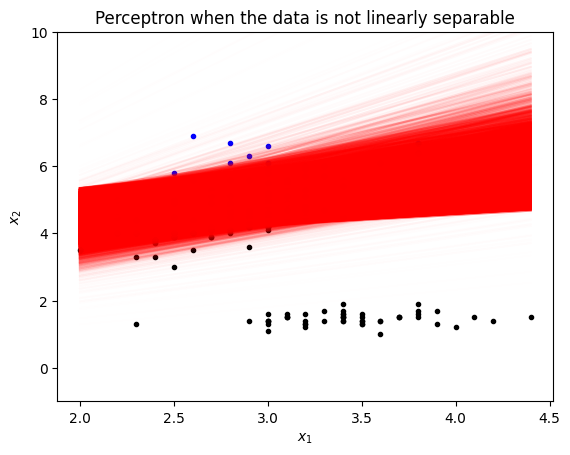

In [ ]:
dataset = datasets.load_iris()
x, y = dataset['data'][:,[1,2]], dataset['target']                          #slice feature 1 and 2 of Iris dataset
y =  y > 1
model = Perceptron(record_updates=True)
yh = model.fit(x,y)
plt.plot(x[y==0,0], x[y==0,1], 'k.' )
plt.plot(x[y==1,0], x[y==1,1], 'b.' )
x_line = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
for t,w in enumerate(model.w_hist):
    coef = -w[0]/w[1]
    plt.plot(x_line, coef*x_line - w[2]/w[1], 'r-', alpha=t/len(model.w_hist), label=f't={t}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.ylim(-1,10)
plt.title('Perceptron when the data is not linearly separable')
plt.show()

-------------------------------------


# Multilayer Perceptron (MLP)



# What is MLP?
A Multilayer Perceptron (MLP) is a type of artificial neural network (ANN) consisting of an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is fully connected to neurons in the next layer. MLP uses non-linear activation functions (e.g., ReLU, Sigmoid) and is trained using backpropagation with gradient descent. It can model complex patterns and solve non-linearly separable problems, making it useful for classification, regression, and pattern recognition tasks.

---



We will start with one of the most basic neural network architectures, a multilayer perceptron (MLP), also known as a feedforward network. The dataset we'll be using is the famous MNIST dataset, a dataset of 28x28 black and white images consisting of handwritten digits, 0 to 9.

#Data Processing
Let's start by importing all the modules we'll need. The main ones we need to import are:

1.   torch for general PyTorch functionality
2.   torch.nn and torch.nn.functional for neural network based functions
3.   torch.optim for our optimizer which will update the parameters of our
     neural network.
4.   torch.utils.data for handling the dataset
5.   torchvision.transforms for data augmentation.
6.   torchvision.datasets for loading the dataset.
7.   sklearn's metrics for visualizing a confusion matrix.
8.   sklearn's decomposition and manifold for visualizing the neural network's  
     representations in two dimensions.
9.   matplotlib for plotting.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

To ensure we get reproducible results we set the random seed for Python, Numpy and PyTorch.

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Dataset Load

In [ ]:
ROOT = '.data'

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]


Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 47.6MB/s]


Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 105MB/s]


Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.47MB/s]


Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw



# Normalization




In [ ]:
mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

In [ ]:
print(f'Calculated mean: {mean}')
print(f'Calculated std: {std}')

Calculated mean: 0.13066047430038452
Calculated std: 0.30810779333114624


# Data Augmentation and Processed

In [ ]:
train_transforms = transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding=2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[mean], std=[std])
                                      ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[mean], std=[std])
                                     ])

In [ ]:
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform=test_transforms)

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 60000
Number of testing examples: 10000


# Image Ploting

In [ ]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')

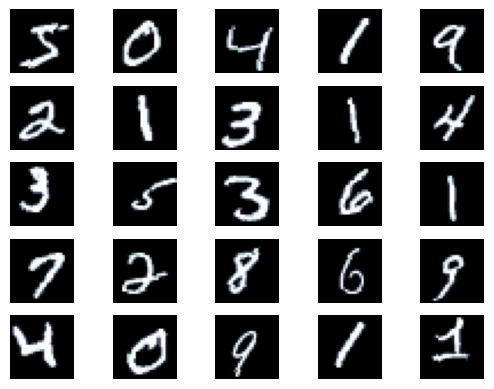

In [ ]:
N_IMAGES = 25
images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]
plot_images(images)

#Validation set creation

In [ ]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

In [ ]:
train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

#Checking the split

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


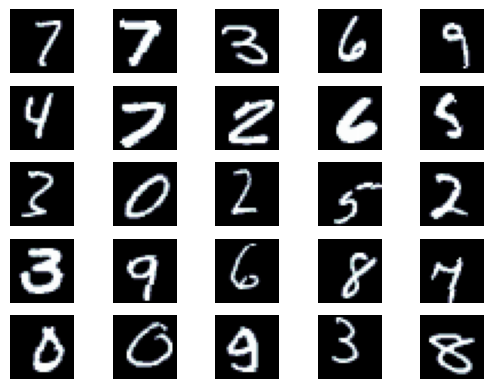

In [ ]:
N_IMAGES = 25

images = [image for image, label in [valid_data[i] for i in range(N_IMAGES)]]

plot_images(images)

In [ ]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

# Dataloader

In [ ]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

# Defining the Model

Our model will be a neural network, specifically a multilayer perceptron (MLP) with two hidden layers. The image below shows the archicture of the model.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/mlp-mnist.png?raw=1)


The ReLU activation function is a popular non-linear function that is simply $max(0, x)$, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)



In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):

        # x = [batch size, height, width]

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        # x = [batch size, height * width]

        h_1 = F.relu(self.input_fc(x))

        # h_1 = [batch size, 250]

        h_2 = F.relu(self.hidden_fc(h_1))

        # h_2 = [batch size, 100]

        y_pred = self.output_fc(h_2)

        # y_pred = [batch size, output dim]

        return y_pred, h_2

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model = MLP(INPUT_DIM, OUTPUT_DIM)

# Trainable Parameters

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 222,360 trainable parameters


# Training the Model

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

We finally define our training loop.

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

The evaluation loop is similar to the training loop.

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

The final step before training is to define a small function to tell us how long an epoch took.

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in trange(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

  0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 31s
	Train Loss: 0.174 | Train Acc: 94.56%
	 Val. Loss: 0.102 |  Val. Acc: 96.99%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 29s
	Train Loss: 0.133 | Train Acc: 95.90%
	 Val. Loss: 0.085 |  Val. Acc: 97.38%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 29s
	Train Loss: 0.119 | Train Acc: 96.30%
	 Val. Loss: 0.081 |  Val. Acc: 97.50%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 29s
	Train Loss: 0.106 | Train Acc: 96.70%
	 Val. Loss: 0.080 |  Val. Acc: 97.51%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 33s
	Train Loss: 0.099 | Train Acc: 96.88%
	 Val. Loss: 0.071 |  Val. Acc: 97.61%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 29s
	Train Loss: 0.090 | Train Acc: 97.22%
	 Val. Loss: 0.088 |  Val. Acc: 97.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 29s
	Train Loss: 0.086 | Train Acc: 97.32%
	 Val. Loss: 0.069 |  Val. Acc: 98.04%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 29s
	Train Loss: 0.084 | Train Acc: 97.37%
	 Val. Loss: 0.066 |  Val. Acc: 97.94%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 29s
	Train Loss: 0.077 | Train Acc: 97.60%
	 Val. Loss: 0.071 |  Val. Acc: 97.98%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 29s
	Train Loss: 0.075 | Train Acc: 97.65%
	 Val. Loss: 0.064 |  Val. Acc: 98.00%


In [ ]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

<ipython-input-32-5d8329f6a89e>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('tut1-model.pt'))


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

# Testing

In [ ]:
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.055 | Test Acc: 98.26%


#Examining the Model

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

We can then get these predictions and, by taking the index of the highest predicted probability, get the predicted labels.

In [ ]:
images, labels, probs = get_predictions(model, test_iterator, device)

pred_labels = torch.argmax(probs, 1)

Next, for each of our examples, we can check if our predicted label matches our actual label.

In [ ]:
corrects = torch.eq(labels, pred_labels)

We can then loop through all of the examples over our model's predictions and store all the examples the model got incorrect into an array.

In [ ]:
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True,
                        key=lambda x: torch.max(x[2], dim=0).values)

We can then plot the incorrectly predicted images along with how confident they were on the actual label and how confident they were at the incorrect label

In [ ]:
def plot_most_incorrect(incorrect, n_images):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image, true_label, probs = incorrect[i]
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim=0)
        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n'
                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace=0.5)

Below we can see the 25 images the model got incorrect and was most confident about.

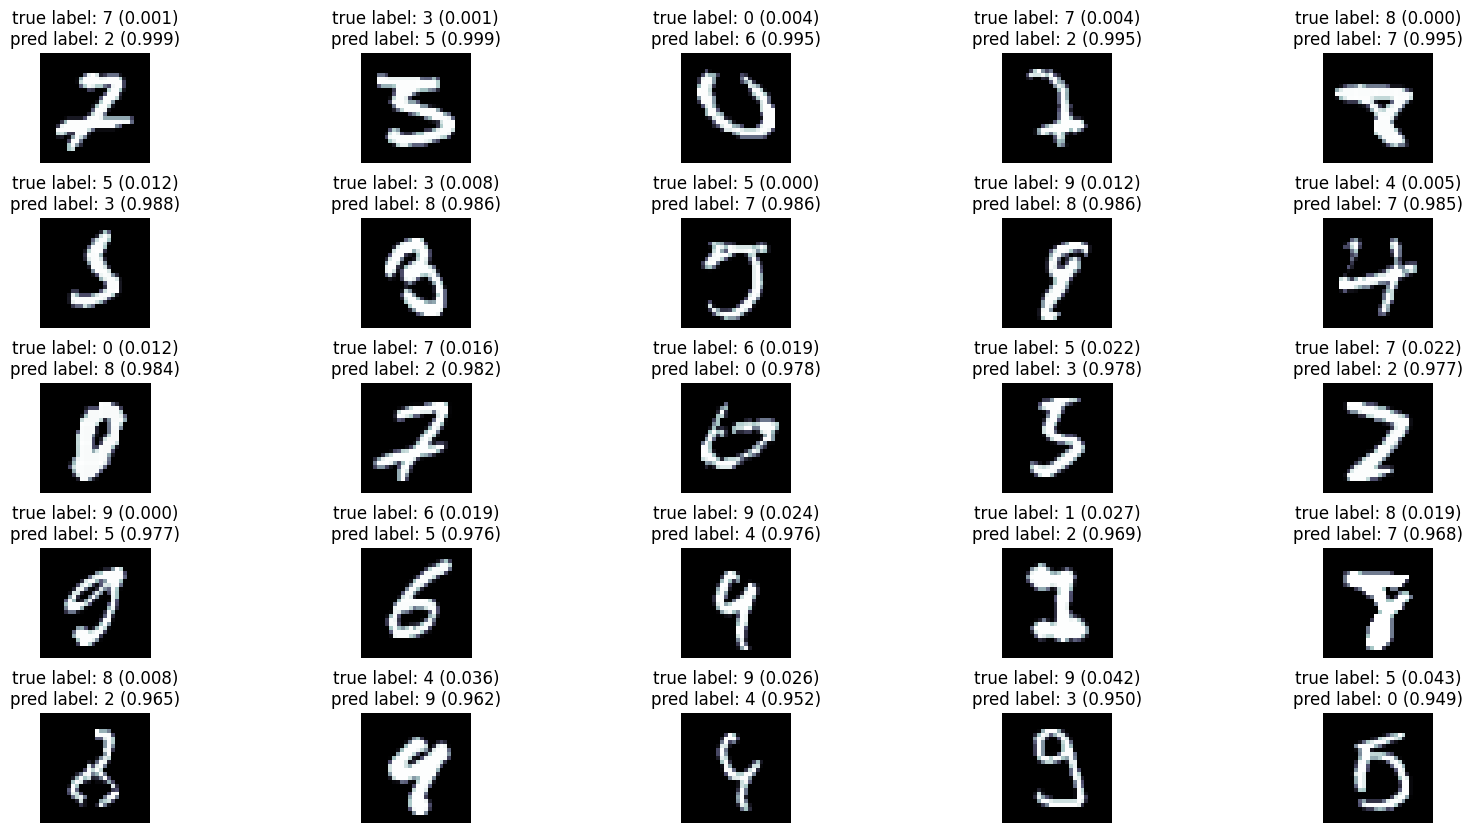

In [ ]:
N_IMAGES = 25

plot_most_incorrect(incorrect_examples, N_IMAGES)